#Objective: Use a Multiple Linear Regression Model to predict what price a given comapny will close on.

This is not a prediction for next day Adjusted close but current day Adjusted based on certain variables.

##Import Libraries

In [282]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [283]:
from IPython import display
display.set_matplotlib_formats('svg') # Improve matplotlib visual quality

<ipython-input-283-dcd5f3b50b37>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # Improve matplotlib visual quality


##Import Dataset

In [284]:
data = yf.download('AAPL', period ='10y')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-01,23.379999,23.517500,23.282499,23.379999,20.680435,152892000
2014-07-02,23.467501,23.514999,23.272499,23.370001,20.671587,113860000
2014-07-03,23.417500,23.525000,23.299999,23.507500,20.793215,91567200
2014-07-07,23.535000,23.997499,23.525000,23.992500,21.222212,225872000
2014-07-08,24.067499,24.200001,23.480000,23.837500,21.085108,260888000
...,...,...,...,...,...,...
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700


##Data Preprocessing

In [285]:
[i for i in data.columns if i != 'Adj Close' and i != 'Close']
# [i for i in data.columns if i != ['Adj Close', 'Close']]

['Open', 'High', 'Low', 'Volume']

In [286]:
x = data[[i for i in data.columns if i != 'Adj Close' and i != 'Close']]
y = data['Adj Close']
x.shape , y.shape

((2517, 4), (2517,))

##Splitting Data to Train & Test set

In [287]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=False)

In [288]:
x_train.shape, x_test.shape

((2013, 4), (504, 4))

In [289]:
x_train

,Open,High,Low,Volume
Date,,,,
2014-07-01,23.379999,23.517500,23.282499,152892000
2014-07-02,23.467501,23.514999,23.272499,113860000
2014-07-03,23.417500,23.525000,23.299999,91567200
2014-07-07,23.535000,23.997499,23.525000,225872000
2014-07-08,24.067499,24.200001,23.480000,260888000
...,...,...,...,...
2022-06-22,134.789993,137.759995,133.910004,73409200
2022-06-23,136.820007,138.589996,135.630005,72433800
2022-06-24,139.899994,141.910004,139.770004,89116800


##Training the Multiple Linear Regression Model

In [290]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [291]:
mlr.coef_, mlr.intercept_

(array([-6.80756577e-01,  9.75379930e-01,  7.02437212e-01, -2.38484055e-09]),
 -1.9685040767330761)

##Predicting the Test Set Results

In [292]:
pred = mlr.predict(x_test)
pred.shape

(504,)

In [293]:
result = pd.DataFrame({'True Value': y_test, 'Prediction': pred, 'Difference': y_test - pred})
result

,True Value,Prediction,Difference
Date,,,
2022-06-29,137.672424,137.505500,0.166924
2022-06-30,135.190491,133.289986,1.900505
2022-07-01,137.375763,136.161383,1.214380
2022-07-05,139.976349,138.376997,1.599352
2022-07-06,141.321121,141.301512,0.019609
...,...,...,...
2024-06-25,209.070007,208.227250,0.842757
2024-06-26,213.250000,211.425078,1.824922
2024-06-27,214.100006,211.352182,2.747824


In [294]:
mse = mean_squared_error(y_test, pred)
mse

2.8151367966225584

##Visualizing the Difference

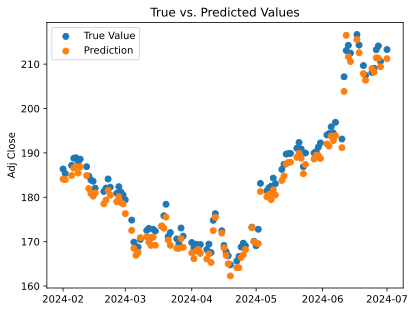

In [295]:
for i in ['True Value', 'Prediction']:
  plt.scatter(result.index[400:], result[i][400:], label = i)

plt.title('True vs. Predicted Values')
plt.ylabel('Adj Close')
plt.legend()

# Let's try and predict tomorrows Adj Close with todays values.

In [296]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-01,23.379999,23.517500,23.282499,23.379999,20.680435,152892000
2014-07-02,23.467501,23.514999,23.272499,23.370001,20.671587,113860000
2014-07-03,23.417500,23.525000,23.299999,23.507500,20.793215,91567200
2014-07-07,23.535000,23.997499,23.525000,23.992500,21.222212,225872000
2014-07-08,24.067499,24.200001,23.480000,23.837500,21.085108,260888000
...,...,...,...,...,...,...
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700


In [297]:
# I can use todays close because I am trying to predict tomorrows Adj close
x = data[[i for i in data.columns if i != 'Adj Close']].iloc[:-1, :]
y = data['Adj Close'].shift(-1).dropna()

In [298]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=False)

In [299]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [300]:
pred = mlr.predict(x_test)
pred.shape

(504,)

In [301]:
result = pd.DataFrame({'True Value': y_test, 'Prediction': pred, 'Difference': y_test - pred})
result

,True Value,Prediction,Difference
Date,,,
2022-06-28,137.672424,135.844385,1.828040
2022-06-29,135.190491,137.563502,-2.373011
2022-06-30,137.375763,133.652067,3.723696
2022-07-01,139.976349,136.808660,3.167689
2022-07-05,141.321121,139.235331,2.085790
...,...,...,...
2024-06-24,209.070007,207.907854,1.162154
2024-06-25,213.250000,207.907781,5.342219
2024-06-26,214.100006,211.656250,2.443756


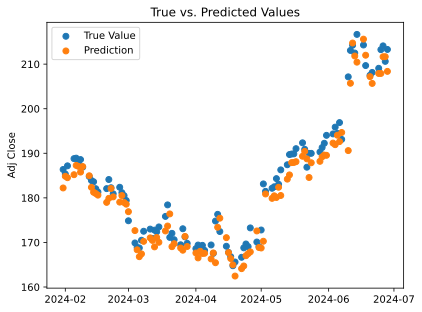

In [302]:
for i in ['True Value', 'Prediction']:
  plt.scatter(result.index[400:], result[i][400:], label = i)

plt.title('True vs. Predicted Values')
plt.ylabel('Adj Close')
plt.legend()

In [303]:
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

3.0591091055563875
0.9760229350537853


In [304]:
# Error W/ close: 3.056474946162961
# Error W/out close: 3.151921863517165